In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from scipy import stats

In [2]:
df = pd.read_csv('/Users/jaeko/JaeMachineLearningProject/MachineLearningProject/jae/manualtrain.csv')

In [3]:
df

,Id,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageType,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,PoolArea,Fence,SaleType,SaleCondition,SalePrice
0,1,65.0,8450,Reg,2Story,7,5,2003,2003,196.0,...,Attchd,2,TA,0,61,0,NaN,WD,Normal,208500
1,2,80.0,9600,Reg,1Story,6,8,1976,1976,0.0,...,Attchd,2,TA,298,0,0,NaN,WD,Normal,181500
2,3,68.0,11250,IR1,2Story,7,5,2001,2002,162.0,...,Attchd,2,TA,0,42,0,NaN,WD,Normal,223500
3,4,60.0,9550,IR1,2Story,7,5,1915,1970,0.0,...,Detchd,3,TA,0,35,0,NaN,WD,Abnorml,140000
4,5,84.0,14260,IR1,2Story,8,5,2000,2000,350.0,...,Attchd,3,TA,192,84,0,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,Reg,2Story,6,5,1999,2000,0.0,...,Attchd,2,TA,0,40,0,NaN,WD,Normal,175000
1456,1457,85.0,13175,Reg,1Story,6,6,1978,1988,119.0,...,Attchd,2,TA,349,0,0,MnPrv,WD,Normal,210000
1457,1458,66.0,9042,Reg,2Story,7,9,1941,2006,0.0,...,Attchd,1,TA,0,60,0,GdPrv,WD,Normal,266500
1458,1459,68.0,9717,Reg,1Story,5,6,1950,1996,0.0,...,Attchd,1,TA,366,0,0,NaN,WD,Normal,142125


In [4]:
print(df.dtypes.to_string())

Id                 int64
LotFrontage      float64
LotArea            int64
LotShape          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
TotalBsmtSF        int64
CentralAir        object
1stFlrSF           int64
2ndFlrSF           int64
GrLivArea          int64
BsmtFullBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
Functional        object
Fireplaces         int64
GarageType        object
GarageCars         int64
GarageQual        object
WoodDeckSF         int64
OpenPorchSF        int64
PoolArea           int64
Fence             object
SaleType          object
SaleCondition     object
SalePrice          int64


In [5]:
df.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageCars', 'GarageQual',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'Fence', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [6]:
for c in df.columns[1:]:
    if c in ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
             'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 
             'WoodDeckSF', 'GrLivArea', 'OpenPorchSF', 
             'PoolArea', 'SalePrice']:
        # skip the above columns, because they are not categorical
        continue
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print(df[c].value_counts(dropna=False).to_string())


COLUMN: "LotShape"
Reg    925
IR1    484
IR2     41
IR3     10

COLUMN: "HouseStyle"
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8

COLUMN: "OverallQual"
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2

COLUMN: "OverallCond"
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1

COLUMN: "CentralAir"
Y    1365
N      95

COLUMN: "BsmtFullBath"
0    856
1    588
2     15
3      1

COLUMN: "FullBath"
2    768
1    650
3     33
0      9

COLUMN: "HalfBath"
0    913
1    535
2     12

COLUMN: "BedroomAbvGr"
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1

COLUMN: "KitchenAbvGr"
1    1392
2      65
3       2
0       1

COLUMN: "KitchenQual"
TA    735
Gd    586
Ex    100
Fa     39

COLUMN: "Functional"
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1

COLUMN: "Fireplaces"
0    690
1  

In [7]:
%matplotlib inline

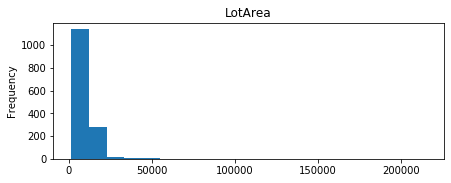

In [8]:
# print a histogram graph of the LotArea
df['LotArea'].plot.hist(
    title='LotArea', 
    bins=20,          
    figsize=(7,2.5),  
)


COLUMN: "LotFrontage"
MAX:  313.0
MIN:  21.0
NaN:  259


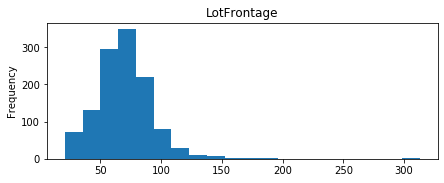




COLUMN: "LotArea"
MAX:  215245
MIN:  1300
NaN:  0


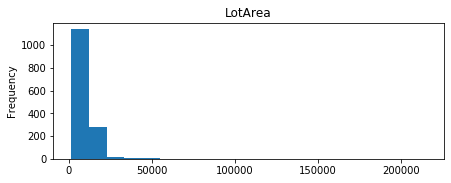




COLUMN: "YearBuilt"
MAX:  2010
MIN:  1872
NaN:  0


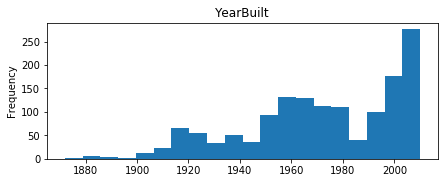




COLUMN: "1stFlrSF"
MAX:  4692
MIN:  334
NaN:  0


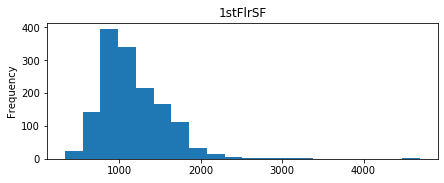




COLUMN: "2ndFlrSF"
MAX:  2065
MIN:  0
NaN:  0


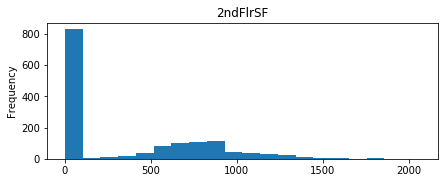




COLUMN: "YearRemodAdd"
MAX:  2010
MIN:  1950
NaN:  0


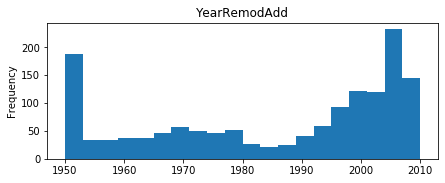




COLUMN: "MasVnrArea"
MAX:  1600.0
MIN:  0.0
NaN:  8


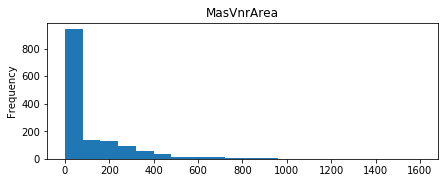




COLUMN: "TotalBsmtSF"
MAX:  6110
MIN:  0
NaN:  0


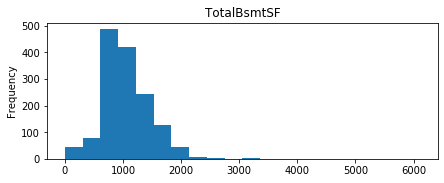




COLUMN: "WoodDeckSF"
MAX:  857
MIN:  0
NaN:  0


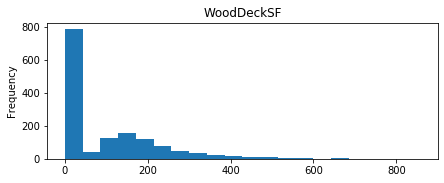




COLUMN: "GrLivArea"
MAX:  5642
MIN:  334
NaN:  0


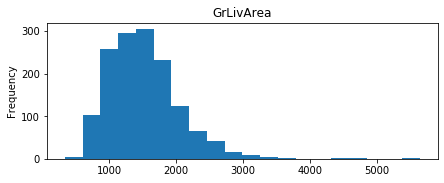




COLUMN: "OpenPorchSF"
MAX:  547
MIN:  0
NaN:  0


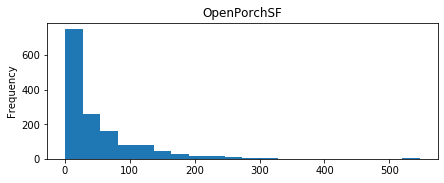




COLUMN: "PoolArea"
MAX:  738
MIN:  0
NaN:  0


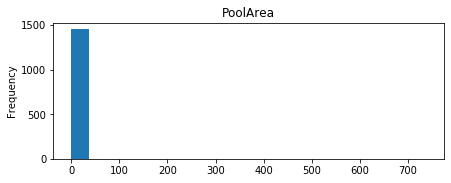




COLUMN: "SalePrice"
MAX:  755000
MIN:  34900
NaN:  0


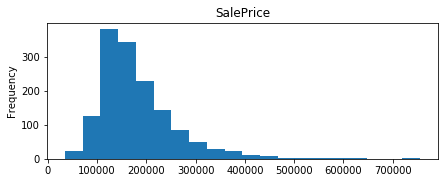

In [9]:
import matplotlib.pyplot as plt
columns_with_numbers = [
    'LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF',
    'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', 'WoodDeckSF', 
    'GrLivArea', 'OpenPorchSF', 'PoolArea', 'SalePrice']
for c in columns_with_numbers:
    print('\nCOLUMN: "{}"\n=============================='.format(c))
    print('MAX:  {}'.format(df[c].max()))
    print('MIN:  {}'.format(df[c].min()))
    print('NaN:  {}'.format(df[c].isna().sum()))
    df[c].plot.hist(title=c, bins=20, figsize=(7,2.5))
    plt.show()
    print('\n')

In [10]:
df.isna().sum()

Id                  0
LotFrontage       259
LotArea             0
LotShape            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
TotalBsmtSF         0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
GrLivArea           0
BsmtFullBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
Functional          0
Fireplaces          0
GarageType         81
GarageCars          0
GarageQual         81
WoodDeckSF          0
OpenPorchSF         0
PoolArea            0
Fence            1179
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [11]:
(df.count() / 1460) *100

Id               100.000000
LotFrontage       82.260274
LotArea          100.000000
LotShape         100.000000
HouseStyle       100.000000
OverallQual      100.000000
OverallCond      100.000000
YearBuilt        100.000000
YearRemodAdd     100.000000
MasVnrArea        99.452055
TotalBsmtSF      100.000000
CentralAir       100.000000
1stFlrSF         100.000000
2ndFlrSF         100.000000
GrLivArea        100.000000
BsmtFullBath     100.000000
FullBath         100.000000
HalfBath         100.000000
BedroomAbvGr     100.000000
KitchenAbvGr     100.000000
KitchenQual      100.000000
Functional       100.000000
Fireplaces       100.000000
GarageType        94.452055
GarageCars       100.000000
GarageQual        94.452055
WoodDeckSF       100.000000
OpenPorchSF      100.000000
PoolArea         100.000000
Fence             19.246575
SaleType         100.000000
SaleCondition    100.000000
SalePrice        100.000000
dtype: float64

In [12]:
df_categorical = df.select_dtypes(include=['object']).copy()

In [13]:
df_categorical

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,Reg,2Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,Reg,1Story,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,IR1,2Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,IR1,2Story,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,IR1,2Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Reg,2Story,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,Reg,1Story,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,Reg,2Story,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,Reg,1Story,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [14]:
labels = df_categorical['HouseStyle'].astype('category').cat.categories.tolist()
#mapping = {'2Story':1, '1Story':2, }  # if did this by hand
mapping = {'HouseStyle' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [15]:
labels

['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story', 'SFoyer', 'SLvl']

In [16]:
from pprint import pprint
pprint(mapping)

{'HouseStyle': {'1.5Fin': 1,
                '1.5Unf': 2,
                '1Story': 3,
                '2.5Fin': 4,
                '2.5Unf': 5,
                '2Story': 6,
                'SFoyer': 7,
                'SLvl': 8}}


In [17]:
mapping['HouseStyle']['2Story']

6

In [18]:
df_c_num = df_categorical.copy()

In [19]:
df_c_num.replace(mapping, inplace=True)
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,Reg,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,Reg,3,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,IR1,6,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Reg,6,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,Reg,3,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,Reg,6,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,Reg,3,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [20]:
df_c_num['HouseStyle'].dtype

dtype('int64')

In [21]:
df_categorical['HouseStyle'].dtype

dtype('O')

In [22]:
# define as category, instead of int64
df_c_num['HouseStyle'] = df_c_num['HouseStyle'].astype('category')
df_c_num['HouseStyle'].dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8], ordered=False)

In [23]:
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,Reg,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,Reg,3,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,IR1,6,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,IR1,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Reg,6,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,Reg,3,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,Reg,6,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,Reg,3,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # label encoder
df_c_num['LotShape'] = le.fit_transform(df_c_num['LotShape'])
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,3,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
1,3,3,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
2,0,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
3,0,6,Y,Gd,Typ,Detchd,TA,NaN,WD,Abnorml
4,0,6,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,3,6,Y,TA,Typ,Attchd,TA,NaN,WD,Normal
1456,3,3,Y,TA,Min1,Attchd,TA,MnPrv,WD,Normal
1457,3,6,Y,Gd,Typ,Attchd,TA,GdPrv,WD,Normal
1458,3,3,Y,Gd,Typ,Attchd,TA,NaN,WD,Normal


In [25]:
le.inverse_transform([0,1,2,3])  # reverse numbers back to category strings

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [26]:
le.classes_

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [27]:
df_c_num = df_categorical.copy()
all_le = {}
for c in df_c_num.columns:
    print(c)
    df_c_num[c] = df_c_num[c].fillna('NaN')
    df_c_num[c] = df_c_num[c].astype('category')
    le = LabelEncoder()  # label encoder
    all_le[c] = le
    df_c_num[c] = le.fit_transform(df_c_num[c])

LotShape
HouseStyle
CentralAir
KitchenQual
Functional
GarageType
GarageQual
Fence
SaleType
SaleCondition


In [28]:
df_c_num

,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,3,5,1,2,6,1,5,4,8,4
1,3,2,1,3,6,1,5,4,8,4
2,0,5,1,2,6,1,5,4,8,4
3,0,5,1,2,6,5,5,4,8,0
4,0,5,1,2,6,1,5,4,8,4
...,...,...,...,...,...,...,...,...,...,...
1455,3,5,1,3,6,1,5,4,8,4
1456,3,2,1,3,2,1,5,2,8,4
1457,3,5,1,2,6,1,5,0,8,4
1458,3,2,1,2,6,1,5,4,8,4


In [29]:
all_le['GarageType'].classes_

array(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd',
       'NaN'], dtype=object)

In [30]:
all_le['GarageType'].inverse_transform([0,1,2,3,4,5,6])

array(['2Types', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd',
       'NaN'], dtype=object)

In [31]:
le = all_le['GarageType']

In [32]:
df_final = pd.concat( [df.drop(columns=df_c_num.columns), df_c_num], axis=1 )
df_final

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,...,LotShape,HouseStyle,CentralAir,KitchenQual,Functional,GarageType,GarageQual,Fence,SaleType,SaleCondition
0,1,65.0,8450,7,5,2003,2003,196.0,856,856,...,3,5,1,2,6,1,5,4,8,4
1,2,80.0,9600,6,8,1976,1976,0.0,1262,1262,...,3,2,1,3,6,1,5,4,8,4
2,3,68.0,11250,7,5,2001,2002,162.0,920,920,...,0,5,1,2,6,1,5,4,8,4
3,4,60.0,9550,7,5,1915,1970,0.0,756,961,...,0,5,1,2,6,5,5,4,8,0
4,5,84.0,14260,8,5,2000,2000,350.0,1145,1145,...,0,5,1,2,6,1,5,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,1999,2000,0.0,953,953,...,3,5,1,3,6,1,5,4,8,4
1456,1457,85.0,13175,6,6,1978,1988,119.0,1542,2073,...,3,2,1,3,2,1,5,2,8,4
1457,1458,66.0,9042,7,9,1941,2006,0.0,1152,1188,...,3,5,1,2,6,1,5,0,8,4
1458,1459,68.0,9717,5,6,1950,1996,0.0,1078,1078,...,3,2,1,2,6,1,5,4,8,4


In [ ]:
chosen = ['LotFrontage','LotArea','LotShape','HouseStyle',
'OverallQual','OverallCond','YearBuilt','YearRemodAdd', 'CentralAir',
'MasVnrArea','1stFlrSF','2ndFlrSF','GrLivArea','Heating','Neighborhood',
'BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
'KitchenQual','Fireplaces','GarageType','GarageCars',
'WoodDeckSF','OpenPorchSF','PoolArea']
chosen #chosen features for models 

In [33]:
df_final.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'SalePrice', 'LotShape',
       'HouseStyle', 'CentralAir', 'KitchenQual', 'Functional', 'GarageType',
       'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [35]:
X = df_final.drop(["SalePrice","Id"],1)   #Feature Matrix
y = df_final["SalePrice"]          #Target Variable

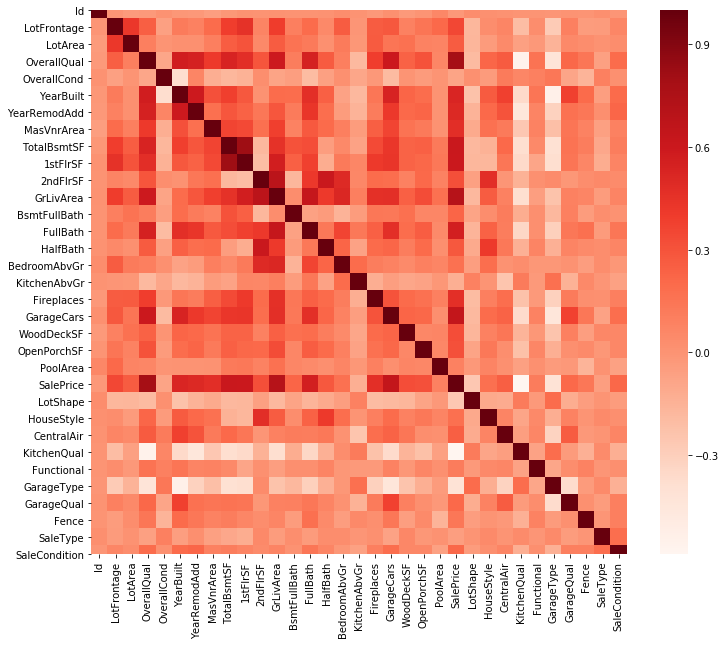

In [36]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [37]:
#Correlation with output variable
cor_target = abs(cor["SalePrice"])
cor_target

Id               0.021917
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond      0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
GrLivArea        0.708624
BsmtFullBath     0.227122
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
Fireplaces       0.466929
GarageCars       0.640409
WoodDeckSF       0.324413
OpenPorchSF      0.315856
PoolArea         0.092404
SalePrice        1.000000
LotShape         0.255580
HouseStyle       0.180163
CentralAir       0.251328
KitchenQual      0.589189
Functional       0.115328
GarageType       0.415283
GarageQual       0.205963
Fence            0.140640
SaleType         0.054911
SaleCondition    0.213092
Name: SalePrice, dtype: float64

In [38]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
GarageCars      0.640409
SalePrice       1.000000
KitchenQual     0.589189
Name: SalePrice, dtype: float64

In [39]:
df_c_num.columns

Index(['LotShape', 'HouseStyle', 'CentralAir', 'KitchenQual', 'Functional',
       'GarageType', 'GarageQual', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [40]:
all_le['HouseStyle'].classes_

array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '2.5Unf', '2Story',
       'SFoyer', 'SLvl'], dtype=object)

In [41]:
all_le['KitchenQual'].classes_

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [42]:
relevant_features.index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'SalePrice', 'KitchenQual'],
      dtype='object')

In [43]:
X = df_final[relevant_features.index]  #Feature Matrix
X.drop(['SalePrice'], inplace=True, axis=1)
y = df_final["SalePrice"]          #Target Variable
#Fitting sm.OLS model
model = sm.OLS(y,X).fit()
model.summary()

C:\Users\jaeko\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              4404.
Date:                Sun, 01 Mar 2020   Prob (F-statistic):                        0.00
Time:                        12:26:32   Log-Likelihood:                         -17434.
No. Observations:                1460   AIC:                                  3.489e+04
Df Residuals:                    1451   BIC:                                  3.493e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
OverallQual   1.888e+04   1153.583     16.369      0.000    1.66e+04    2.11e+04
YearBuilt      141.6365     44.991      3.148      0.002      53.382     229.891
YearRemodAdd  -153.0156     43.879     -3.487      0.001    -239.090     -66.942
TotalBsmtSF     21.3830      4.178      5.118      0.000      13.188      29.578
1stFlrSF         9.9945      4.819      2.074      0.038       0.542      19.447
GrLivArea       44.3991      2.922     15.193      0.000      38.667      50.131
FullBath      -739.5814   2460.032     -0.301      0.764   -5565.181    4086.018
GarageCars    1.671e+04   1740.589      9.601      0.000    1.33e+04    2.01e+04
KitchenQual  -1.692e+04   1418.612    -11.925      0.000   -1.97e+04   -1.41e+04
==============================================================================
Omnibus:                      491.707   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47399.391
Skew:                          -0.566   Prob(JB):                         0.00
Kurtosis:                      30.891   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [45]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 20% is test; 80% is training
print("X_train.shape: {}    y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_test.shape: {}    y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (1168, 9)    y_train.shape: (1168,)
X_test.shape: (292, 9)    y_test.shape: (292,)


In [47]:
print(292/1469)
X_train

0.19877467665078286


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,KitchenQual
819,7,2009,2010,1358,1358,1358,2,2,2
184,5,1908,1991,504,936,1252,1,2,3
1407,5,1985,1985,833,833,833,1,0,3
395,5,1956,1956,1144,1144,1144,1,1,3
453,8,2008,2008,768,786,1590,2,2,2
...,...,...,...,...,...,...,...,...,...
707,8,2006,2006,1324,1324,1324,2,2,2
809,5,1898,1965,849,1075,2138,2,2,3
45,9,2005,2005,1752,1752,1752,2,2,0
492,6,2006,2006,728,728,1456,2,2,3


In [48]:
X_test

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,KitchenQual
1268,8,1935,1997,728,1968,3447,3,3,2
984,5,1977,1977,0,1302,1734,2,2,2
862,6,1984,1985,1040,1097,1097,2,2,3
143,7,1999,1999,1490,1501,1501,2,2,2
590,7,2004,2004,770,770,1582,2,2,2
...,...,...,...,...,...,...,...,...,...
585,8,2005,2006,1868,2028,2028,2,3,2
186,7,1990,1991,1188,1217,1217,2,2,2
307,6,1920,1950,319,1035,1406,1,0,1
171,6,1960,1960,1080,1656,1656,1,2,3


In [49]:
y_test

1268    381000
984     126000
862     152000
143     204000
590     185900
         ...  
585     369900
186     173000
307      89500
171     215000
84      168500
Name: SalePrice, Length: 292, dtype: int64

In [50]:
# fit a model for one split (above) of 1469 rows into the train and test data sets
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Prediction vs. True Values for Housing')

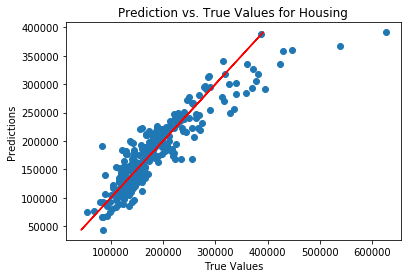

In [51]:
## The line / model
plt.scatter(y_test, predictions)   # plot the test points
plt.plot(predictions, predictions, color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Prediction vs. True Values for Housing")

In [52]:
print("Model Score:  {}".format(model.score(X_test, y_test)))

Model Score:  0.8033514236774923


# Cross Validation

K-Folds Cross Validation

In [53]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5) # make 5 splits.  each test set is a different 20% of all rows
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [54]:
# given dataframe X, how do I just select row 5 and 8
X.iloc[[5,8]]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,KitchenQual
5,5,1993,1995,796,796,1362,1,2,3
8,7,1931,1950,952,1022,1774,2,2,3


Model 0 Score:  0.8381454634440298


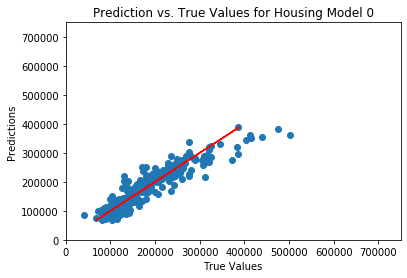

Model 1 Score:  0.7928065113002389


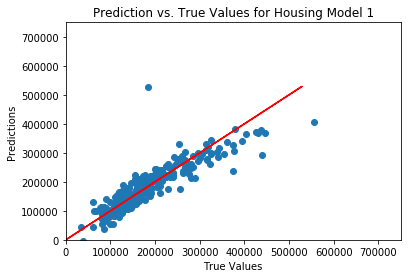

Model 2 Score:  0.7965658375960558


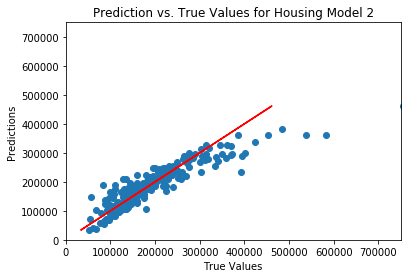

Model 3 Score:  0.7923042589396975


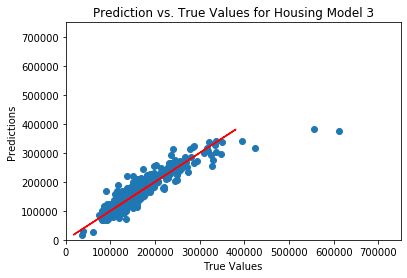

Model 4 Score:  0.665776210304704


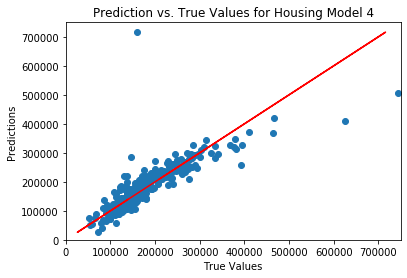

In [57]:
# shows how the test and train datasets are split
# then runs a linear regression model on each of the splits
# then prints out the model score (score=1.0 is perfect; score=0.0 is horrible)
    
# Define or model as a linear regression
lm = linear_model.LinearRegression()
model_number = 0  # count for the model number 
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "\nTEST:", test_index)
    # split the training and test set dependent variables
    # i.e., the dataframe with all the columns, except housing price
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    # split the housing price into training and test sets
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # fit the model for this training set
    model = lm.fit(X_train, y_train)
    # make prediction of the test set with this model
    #predictions = lm.predict(X_test)
    predictions = model.predict(X_test)
    print("Model {} Score:  {}".format(model_number, model.score(X_test, y_test)))
    # plot predicted vs. real values
    plt.scatter(y_test, predictions)   # plot the test points
    # plot the red line, which is if the predictions were perfect.
    plt.plot(predictions, predictions, color='r') 
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Prediction vs. True Values for Housing Model {}".format(model_number))
    ax = plt.gca()
    # All the model plots should have the same limits for the 
    # x- and y-axes; i.e., the start and end values 
    ax.set_xlim(left=0, right=750000)
    ax.set_ylim(bottom=0, top=750000)
    plt.show()
    model_number += 1

In [55]:
# Necessary imports: 
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Automatic k-Folds cross validation

The above ran loops to do cross validaiton, but sklearn has methods to do this automatically in one line of code instead of the complicated loop above. Here, I show how to do this in one line.  

In [56]:
# Perform 5-fold cross validation automatically
# very similar to above loop, but library does all work for you
lm = linear_model.LinearRegression()
scores = cross_val_score(lm, X, y, cv=5)
print("Cross-validated scores:", scores)
# NOTE: the output scores below are the SAME as when we did the 5-fold models manually above.

Cross-validated scores: [0.83814546 0.79280651 0.79656584 0.79230426 0.66577621]


Text(0.5, 1.0, 'Prediction vs. True Values for Housing for 5 Splits')

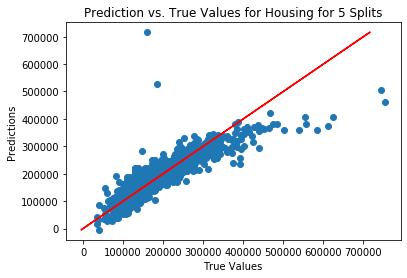

In [57]:
# Make cross validated predictions
# This plots the prediction of ALL the 5-fold model test data
number_of_splits = 5
p = cross_val_predict(lm, X, y, cv=number_of_splits)  # predictions
plt.scatter(y, p)
plt.plot(p, p, color='r')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Prediction vs. True Values for Housing for {} Splits".format(number_of_splits))

In [58]:
accuracy = metrics.r2_score(y, p)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.7751085318468551


### Our model is good

Our model has reasonable cross-predicted accuracy. Each model score is ok or good (score > 0.6).

If we had more time, we get an even better model by:
* Using better methods for converting categorical data into numbers, like using one hot encoding
* Using a better method for feature selection.  We used the filtering method based on the pearson correlation to the housing price.  A better method is iterative backwards elimination explained ["here"](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)

# Predicting New Data with Model

Now that we have a Linear Regression Model that we trained with the full training set, how do we predict new data. i.e., how do we predict housing prices for new data?

In [59]:
# Create the model (same as what we did above)
# just redid it here so that it's all together in one place
X = df_final[relevant_features.index]  #Feature Matrix
X.drop(['SalePrice'], inplace=True, axis=1)
y = df_final["SalePrice"]          #Target Variable
#Fitting sm.OLS model
model = sm.OLS(y,X).fit()
#model.summary()   # this would print out the same model summary

C:\Users\jaeko\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [60]:
lm = linear_model.LinearRegression()
# Previously we trained the model on a split of the original data, as below
#model = lm.fit(X_train, y_train)
# but now we will train the model on all the data
model = lm.fit(X, y)

In [61]:
# get new data
X_new_data = pd.read_csv('/Users/jaeko/JaeMachineLearningProject/MachineLearningProject/jae/test_new.csv')

In [62]:
X_new_data

,Id,LotFrontage,LotArea,LotShape,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Fireplaces,GarageType,GarageCars,GarageQual,WoodDeckSF,OpenPorchSF,PoolArea,Fence,SaleType,SaleCondition
0,1461,80.0,11622,Reg,1Story,5,6,1961,1961,0.0,...,0,Attchd,1.0,TA,140,0,0,MnPrv,WD,Normal
1,1462,81.0,14267,IR1,1Story,6,6,1958,1958,108.0,...,0,Attchd,1.0,TA,393,36,0,NaN,WD,Normal
2,1463,74.0,13830,IR1,2Story,5,5,1997,1998,0.0,...,1,Attchd,2.0,TA,212,34,0,MnPrv,WD,Normal
3,1464,78.0,9978,IR1,2Story,6,6,1998,1998,20.0,...,1,Attchd,2.0,TA,360,36,0,NaN,WD,Normal
4,1465,43.0,5005,IR1,1Story,8,5,1992,1992,0.0,...,0,Attchd,2.0,TA,0,82,0,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,Reg,2Story,4,7,1970,1970,0.0,...,0,NaN,0.0,NaN,0,0,0,NaN,WD,Normal
1455,2916,21.0,1894,Reg,2Story,4,5,1970,1970,0.0,...,0,CarPort,1.0,TA,0,24,0,NaN,WD,Abnorml
1456,2917,160.0,20000,Reg,1Story,5,7,1960,1996,0.0,...,1,Detchd,2.0,TA,474,0,0,NaN,WD,Abnorml
1457,2918,62.0,10441,Reg,SFoyer,5,5,1992,1992,0.0,...,0,NaN,0.0,NaN,80,32,0,MnPrv,WD,Normal


In [63]:
# above read in csv file needs to be processed in same way
# that processed the training set - like changing the categorical data into 
# numbers, removing the ID column, etc
from sklearn.preprocessing import LabelEncoder
def process_data(df, label_encoders, relevant_features):
    df_categorical = df.select_dtypes(include=['object']).copy()
    df_c_num = df_categorical.copy()
    for c in df_c_num.columns:
        df_c_num[c] = df_c_num[c].fillna('NaN')
        df_c_num[c] = df_c_num[c].astype('category')
        le = label_encoders[c]
        df_c_num[c] = le.fit_transform(df_c_num[c])   
    df_final = pd.concat( [df.drop(columns=df_c_num.columns), df_c_num], axis=1 )
    df_final = df_final[relevant_features]
    return df_final


In [64]:
# check that the label encoders we previously made are still there
all_le.items()

dict_items([('LotShape', LabelEncoder()), ('HouseStyle', LabelEncoder()), ('CentralAir', LabelEncoder()), ('KitchenQual', LabelEncoder()), ('Functional', LabelEncoder()), ('GarageType', LabelEncoder()), ('GarageQual', LabelEncoder()), ('Fence', LabelEncoder()), ('SaleType', LabelEncoder()), ('SaleCondition', LabelEncoder())])

In [65]:
# get a list of the relevant features
# these are the column names that we are using in our linear regression
# previously we found these column names for all columns that had a 
# pearson correlation to SalePrice above 0.5
relevant_features = cor_target[cor_target>0.5]
# the above relevant_features is a dictionary; we need to turn this into 
# a list with only the names of the columns
relevant_features = [f for f in relevant_features.keys() if f!='SalePrice']
# process the dataframe and convert categorical to numbers, 
# and remove non-relavant features (i.e., remove non-relevant columns)
# and change categorical NaN to the string 'NaN'
X_processed = process_data(X_new_data, all_le, relevant_features)
# this is the final dataframe, shown below, that we enter into our model
# to make SalePrice predictions of the new housing data.
X_processed   

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,KitchenQual
0,5,1961,1961,882.0,896,896,1,1.0,4
1,6,1958,1958,1329.0,1329,1329,1,1.0,2
2,5,1997,1998,928.0,928,1629,2,2.0,4
3,6,1998,1998,926.0,926,1604,2,2.0,2
4,8,1992,1992,1280.0,1280,1280,2,2.0,2
...,...,...,...,...,...,...,...,...,...
1454,4,1970,1970,546.0,546,1092,1,0.0,4
1455,4,1970,1970,546.0,546,1092,1,1.0,4
1456,5,1960,1996,1224.0,1224,1224,1,2.0,4
1457,5,1992,1992,912.0,970,970,1,0.0,4


In [66]:
# do any columns have NaN ?
def num_NaN_per_column(df):
    print('Column Name           NaN Count')
    print('='*50)
    for c in df.columns:
        NaN_count = df[c].isna().sum()
        print('{:16s}  {:10d}'.format(c, NaN_count))
num_NaN_per_column(X_processed)

Column Name           NaN Count
OverallQual                0
YearBuilt                  0
YearRemodAdd               0
TotalBsmtSF                1
1stFlrSF                   0
GrLivArea                  0
FullBath                   0
GarageCars                 1
KitchenQual                0


In [67]:
# which rows have these NaN ?
# one is in the TotalBsmtSF
X_processed[X_processed['TotalBsmtSF'].isna()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,KitchenQual
660,4,1946,1950,NaN,896,896,1,1.0,4


In [68]:
# the other NaN is the below printed one in the 'GarageCars' column
X_processed[X_processed['GarageCars'].isna()]

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,GarageCars,KitchenQual
1116,5,1923,1999,859.0,942,1828,2,NaN,2


In [69]:
# will assume that these NaN values should be zero for the above
# two instances.  We replace these NaN with zero
X_processed['TotalBsmtSF'].fillna(0.0, inplace=True)
X_processed['GarageCars'].fillna(0.0, inplace=True)
# recheck if any NaN's left; print out table of # NaN's per column
num_NaN_per_column(X_processed)

Column Name           NaN Count
OverallQual                0
YearBuilt                  0
YearRemodAdd               0
TotalBsmtSF                0
1stFlrSF                   0
GrLivArea                  0
FullBath                   0
GarageCars                 0
KitchenQual                0


In [70]:
# now that have model, we can make predictions on new data
predictions = model.predict(X_processed)

Text(0.5, 0, 'SalePrice')

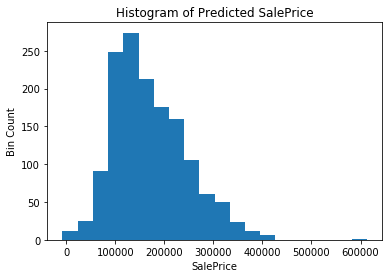

In [71]:
plt.hist(predictions, bins=20)
plt.title('Histogram of Predicted SalePrice')
plt.ylabel('Bin Count')
plt.xlabel('SalePrice')

In [72]:
print("Min Predicted SalePrice: {:10.0f}".format(predictions.min()))
print("Max Predicted SalePrice: {:10.0f}".format(predictions.max()))

Min Predicted SalePrice:      -7805
Max Predicted SalePrice:     612717


In [76]:
print("Number of Negative predicted SalePrice: {}".format(
    sum(predictions<0.0)))

Number of Negative predicted SalePrice: 4


In [79]:
# save predictions to csv with two columns:  Id, SalePrice
# to get the Id, must go back to original read in csv
# and then merge that into a dataframe with the predicitons
predictionDF = pd.DataFrame()
predictionDF['Id'] = X_new_data['Id']
# predictions of SalePrice are floating point numbers
# here we round the floats to the nearest integer SalePrice dollar
predictions = predictions.round(0).astype('int64')
predictionDF['SalePrice'] = predictions
predictionDF.to_csv('/Users/jaeko/JaeMachineLearningProject/MachineLearningProject/new_predictions.csv')

In [80]:
# show the dataframe saved to the csv file above
predictionDF

,Id,SalePrice
0,1461,87099
1,1462,166877
2,1463,148757
3,1464,193228
4,1465,218367
...,...,...
1454,2915,59618
1455,2916,73692
1456,2917,133517
1457,2918,91786


In [3]:
#find numeric columns in given df,replace missing rows with column mean, return dataframe
def num_cleaner (df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    cl_df = pd.DataFrame()
    df2 = df.select_dtypes(include=numerics).copy() #only numeric columns
    nullCols = df2.isnull() #df of T/F, T if null (bool mask)
    means = df2.mean() #series of mean per column
    for c in df2:
        for r in range(0,len(df2)-1):
            if df2[c].iloc[r] and nullCols[c].iloc[r]:
                df2[c].iloc[r] = means[c]
                #print(df2[c].iloc[r]) sanity check, last 8 should be 103.685 for MasVnrArea
    cl_df = df2.copy() #this will return only numeric features, need to add back type ob features after cleaning/dummify them
    return cl_df

#dummify object columns and return dataframe
def mass_dummify (df):
    df2 = df.select_dtypes(include=object).copy()
    dum_df = pd.get_dummies(df2) #currently 61 columns, no neighborhoods
    return dum_df

In [4]:
df

NameError: name 'df' is not defined